# **Clustering:**

Clustering is another use-case of unsupervised ML algorithm.It is the task of grouping a set of objects in such a way that objects in the same group are more similar to each other than to those in the other groups. here group is also called as cluster.

**applications**: Natural Language Processing (NLP), Computer Vision , Stock markets, customer/market segmentation.

**Types**:

1. **Connectivity based**: distance based, eg. hierarchical clustering

2. **Centroid based**: represents each cluster by a single mean vector , eg. k-means clustering

3. **Distribution based**: modeled using statistical distribution, eg. multivariate normal distribution used by expectation maximization algorithm

4. **Density based**: Defines clusters as connected dense regions in the data space, eg. DBSCAN



/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(),

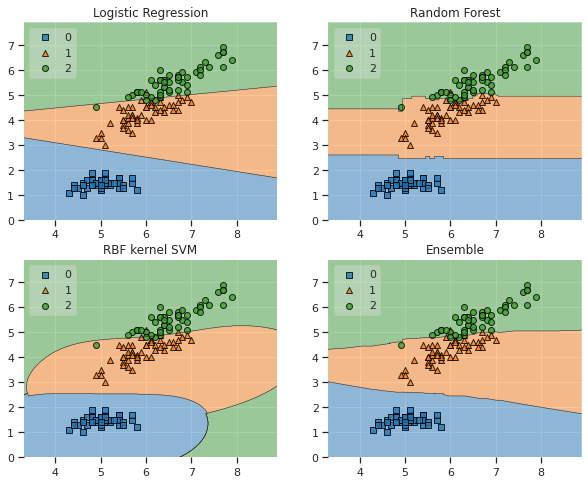

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions

# Initializing Classifiers
clf1 = LogisticRegression(random_state=0,solver='lbfgs',multi_class='auto')
clf2 = RandomForestClassifier(random_state=0,n_estimators=100)
clf3 = SVC(random_state=0, probability=True,gamma= 'auto')
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3],
                              weights=[2, 1, 1], voting='soft')

# Loading some example data
X, y = iris_data()
X = X[:,[0, 2]]

# Plotting Decision Regions

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

labels = ['Logistic Regression',
          'Random Forest',
          'RBF kernel SVM',
          'Ensemble']

for clf, lab, grd in zip([clf1, clf2, clf3, eclf],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y,
                                clf=clf, legend=2)
    plt.title(lab)

plt.show()

## **Linkage methods in clustering:**
 shows distance between the two clusters.

1.Single linkage: minimum (shortest) distance between any single pt in the first cluster and any single pt in the second cluster.

2.Complete linkage: maximum (furthest) distance between any single pt in the first cluster and any single pt in the second cluster.

3.Average linkage: average distance between any single pt in the first cluster and any single pt in the second cluster.

4.Centroid method: distance between the two mean vectors of the clusters.

5.Ward's method: ANOVA based approach. Iterative process.minimize the total within the cluster variance.

In [63]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
sns.set()

In [64]:
from sklearn.datasets import make_blobs

In [65]:
x,y = make_blobs(n_samples=600,centers=5,cluster_std=0.60,random_state=42)

In [66]:
x.shape

(600, 2)

In [67]:
y.shape

(600,)

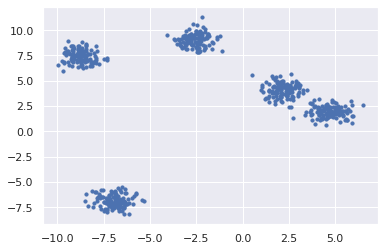

In [68]:
plt.scatter(x[:,0],x[:,1],s = 10)

In [69]:
import scipy
from scipy.cluster.hierarchy import ward,dendrogram,linkage

In [70]:
distance = linkage(x,'ward') 

**Dendogram:**

{'color_list': ['g', 'g', 'r', 'b', 'b'],
 'dcoord': [[0.0, 7.958057648307816, 7.958057648307816, 0.0],
  [0.0, 36.55598160502717, 36.55598160502717, 7.958057648307816],
  [0.0, 69.99000102183193, 69.99000102183193, 0.0],
  [36.55598160502717,
   162.40222920235217,
   162.40222920235217,
   69.99000102183193],
  [0.0, 191.095481440824, 191.095481440824, 162.40222920235217]],
 'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [45.0, 45.0, 55.0, 55.0],
  [22.5, 22.5, 50.0, 50.0],
  [5.0, 5.0, 36.25, 36.25]],
 'ivl': ['(120)', '(119)', '(26)', '(95)', '(120)', '(120)'],
 'leaves': [1191, 1192, 1175, 1188, 1190, 1193]}

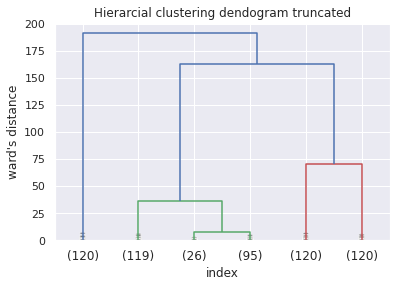

In [71]:
plt.title('Hierarcial clustering dendogram truncated')
plt.xlabel('index')
plt.ylabel("ward's distance" )
dendrogram(distance,truncate_mode='lastp',p=6,leaf_rotation=0.,leaf_font_size=12.,show_contracted=True)

## **Retrieve the cluster:**

using scipy's **fcluster** method.

Retrieve by distance or no.of clusters.

In [72]:
from scipy.cluster.hierarchy import fcluster

### **By Distance:** 

In [73]:
max_d = 25

cluster = fcluster(distance,max_d,criterion='distance')

cluster

array([1, 1, 5, 3, 3, 2, 3, 4, 5, 2, 1, 5, 2, 4, 4, 1, 4, 3, 5, 3, 4, 3,
       2, 5, 5, 2, 2, 3, 3, 3, 1, 4, 5, 1, 1, 3, 2, 2, 1, 4, 3, 2, 2, 1,
       1, 2, 2, 3, 5, 3, 4, 2, 1, 2, 4, 3, 4, 1, 1, 3, 2, 4, 1, 4, 3, 2,
       1, 3, 2, 2, 5, 3, 1, 3, 5, 1, 4, 5, 1, 5, 3, 1, 1, 3, 3, 4, 3, 1,
       5, 5, 5, 1, 4, 4, 2, 2, 4, 4, 3, 1, 3, 5, 4, 5, 5, 1, 3, 4, 3, 4,
       4, 5, 4, 3, 5, 2, 5, 4, 1, 1, 5, 5, 3, 3, 2, 4, 4, 4, 5, 2, 2, 1,
       1, 4, 3, 4, 2, 2, 2, 1, 5, 2, 2, 1, 4, 5, 4, 1, 2, 1, 5, 2, 1, 4,
       1, 4, 2, 3, 5, 5, 3, 3, 3, 4, 2, 4, 4, 3, 4, 1, 2, 2, 2, 4, 4, 3,
       2, 3, 4, 3, 2, 5, 3, 1, 1, 2, 4, 2, 5, 5, 2, 3, 4, 3, 1, 2, 5, 3,
       4, 2, 5, 4, 3, 5, 3, 5, 1, 1, 2, 2, 3, 3, 2, 3, 4, 1, 1, 5, 4, 2,
       2, 1, 5, 2, 5, 4, 1, 4, 3, 5, 2, 4, 2, 5, 3, 1, 1, 4, 4, 5, 4, 2,
       1, 3, 1, 3, 3, 4, 2, 2, 2, 1, 4, 5, 2, 3, 5, 1, 2, 2, 2, 4, 3, 1,
       3, 5, 1, 4, 4, 2, 2, 2, 1, 2, 3, 1, 3, 4, 5, 1, 5, 4, 5, 4, 4, 1,
       5, 2, 2, 3, 1, 1, 2, 1, 1, 5, 1, 3, 5, 4, 4,

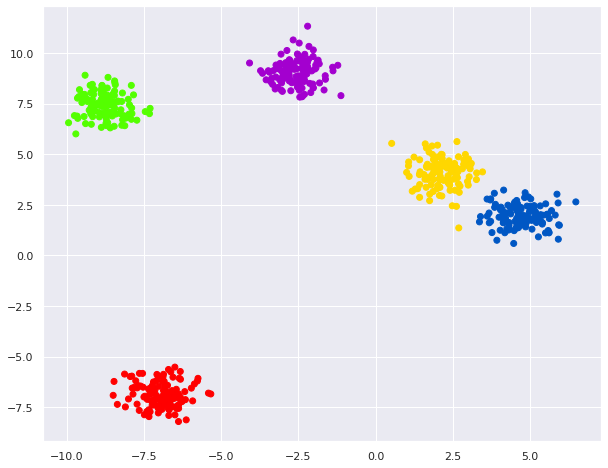

In [74]:
plt.figure(figsize=(10,8))
plt.scatter(x[:,0],x[:,1],c = cluster,cmap = 'prism')

### **By Cluster:**  

In [75]:
k = 5
cluster = fcluster(distance,k,criterion='maxclust')
cluster

array([1, 1, 5, 3, 3, 2, 3, 4, 5, 2, 1, 5, 2, 4, 4, 1, 4, 3, 5, 3, 4, 3,
       2, 5, 5, 2, 2, 3, 3, 3, 1, 4, 5, 1, 1, 3, 2, 2, 1, 4, 3, 2, 2, 1,
       1, 2, 2, 3, 5, 3, 4, 2, 1, 2, 4, 3, 4, 1, 1, 3, 2, 4, 1, 4, 3, 2,
       1, 3, 2, 2, 5, 3, 1, 3, 5, 1, 4, 5, 1, 5, 3, 1, 1, 3, 3, 4, 3, 1,
       5, 5, 5, 1, 4, 4, 2, 2, 4, 4, 3, 1, 3, 5, 4, 5, 5, 1, 3, 4, 3, 4,
       4, 5, 4, 3, 5, 2, 5, 4, 1, 1, 5, 5, 3, 3, 2, 4, 4, 4, 5, 2, 2, 1,
       1, 4, 3, 4, 2, 2, 2, 1, 5, 2, 2, 1, 4, 5, 4, 1, 2, 1, 5, 2, 1, 4,
       1, 4, 2, 3, 5, 5, 3, 3, 3, 4, 2, 4, 4, 3, 4, 1, 2, 2, 2, 4, 4, 3,
       2, 3, 4, 3, 2, 5, 3, 1, 1, 2, 4, 2, 5, 5, 2, 3, 4, 3, 1, 2, 5, 3,
       4, 2, 5, 4, 3, 5, 3, 5, 1, 1, 2, 2, 3, 3, 2, 3, 4, 1, 1, 5, 4, 2,
       2, 1, 5, 2, 5, 4, 1, 4, 3, 5, 2, 4, 2, 5, 3, 1, 1, 4, 4, 5, 4, 2,
       1, 3, 1, 3, 3, 4, 2, 2, 2, 1, 4, 5, 2, 3, 5, 1, 2, 2, 2, 4, 3, 1,
       3, 5, 1, 4, 4, 2, 2, 2, 1, 2, 3, 1, 3, 4, 5, 1, 5, 4, 5, 4, 4, 1,
       5, 2, 2, 3, 1, 1, 2, 1, 1, 5, 1, 3, 5, 4, 4,

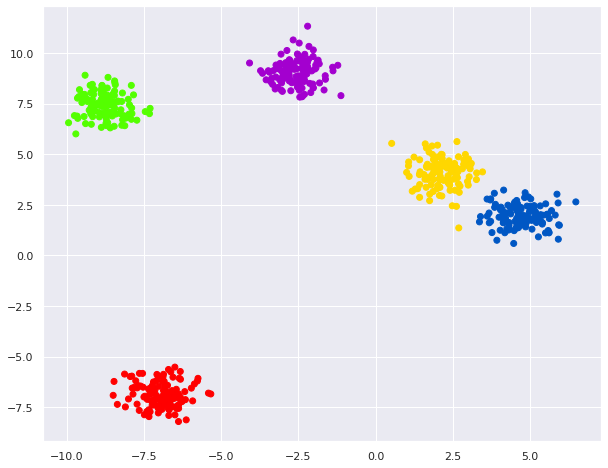

In [76]:
plt.figure(figsize=(10,8))
plt.scatter(x[:,0],x[:,1],c = cluster,cmap = 'prism')

# **K - Means Clustering:**

1. Analyze and find patterns/clusters within data.

2. Distance measures.
3. it clusters data by trying to separate samples in n groups of equal variance.
4. minimizing a criterion known as the inertia or within-cluster sum-of-squares.
5. This algorithm requires the number of clusters to be specified.
6. It scales well to large number of samples. 

### **How Does it work?**
1. divides a set of N samples X  into K disjoint clusters.
2. each clusters described by the mean of the samples in the cluster.
3. The means $\mu$ are commonly called the cluster **centroids**.
4. the clusters are not, in general, points from X , although they live in the same space.
5. The K-means algorithm aims to choose centroids that minimize the inertia, or within-cluster sum-of-squares criterion:
> $\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_i - \mu_j||^2)$
 
 >Inertia can be recognized as a measure of how internally coherent clusters are. 



In [77]:
from sklearn.cluster import KMeans

In [78]:
kmean = KMeans(n_clusters=9)
kmean.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [79]:
y_pred = kmean.predict(x)

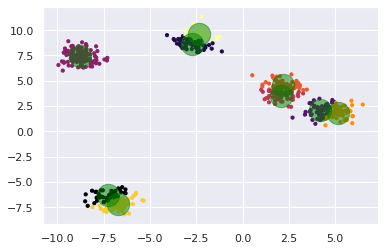

In [80]:
plt.scatter(x[:,0],x[:,1],c = y_pred, s = 10, cmap='inferno')
center = kmean.cluster_centers_
plt.scatter(center[:,0],center[:,1],c='green',s = 500,alpha=0.5) # total 9 centers/clusters

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


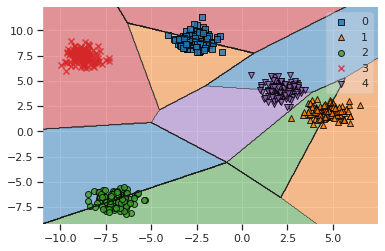

In [81]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x,y,clf = kmean) # 9 regions

## **Methods to choose no.of clusters in k-means clustering:**


### **1.Elbow Method:**
 

 1. uses intrinsic metrics.
 2. ex. within-cluster sum-of-squares or inertia(sklearn's method).

In [82]:
kmean.inertia_

289.52843700652295

In [83]:
sse_ = []
for k in range(1,8):
  kmean = KMeans(n_clusters=k).fit(x)
  sse_.append([k,kmean.inertia_])

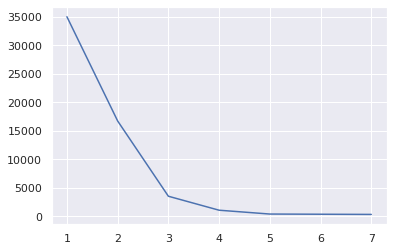

In [84]:
plt.plot(pd.DataFrame(sse_)[0],pd.DataFrame(sse_)[1])

from the graph : n_clusters should be 3 or 4 or 5.

### **2.Silhouette Method:**
The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample.

Silhouette score, (for a sample) = $ \frac{(b - a)} { max(a, b)}$. 
> value range is -1 to 1.

>The best value is 1 and the worst value is -1. 

>Values near 0 indicate overlapping clusters. 

>Negative values indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.


In [85]:
from sklearn.metrics import silhouette_score

In [86]:
sse_ = []
for k in range(2,8):
  kmean = KMeans(n_clusters=k).fit(x)
  sse_.append([k,silhouette_score(x,kmean.labels_)])

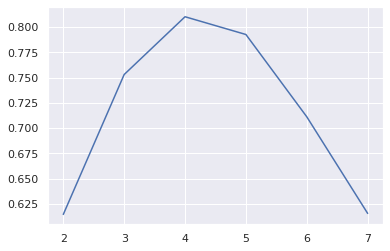

In [87]:
plt.plot(pd.DataFrame(sse_)[0],pd.DataFrame(sse_)[1])

no.of clusters should be 4 or 5 (as peak).

### **3.Mean Shift Method:**

* Non - parametric.

* Identify centroid location.
 * for each data point it defines a window around it.
 * compute centroid.
 * update centroid locaton.
 * continue to update windows.
 * keep shifting the centroid, means towards the peek of each cluster. hence the name *mean shift*.
 * continuous untill cenroid no longer move.

* Used for object tracking.



In [88]:
from sklearn.cluster import MeanShift,estimate_bandwidth

In [89]:
from itertools import cycle

In [90]:
bx = estimate_bandwidth(x,quantile=0.1,n_samples=len(x))


In [91]:
meanshift_model = MeanShift(bandwidth=bx,bin_seeding = True)

In [92]:
meanshift_model.fit(x)

MeanShift(bandwidth=0.9946702350329211, bin_seeding=True, cluster_all=True,
          max_iter=300, min_bin_freq=1, n_jobs=None, seeds=None)

In [93]:
centers = meanshift_model.cluster_centers_

In [94]:
print(centers)

[[-2.67328294  8.99938097]
 [ 4.68368104  1.95180624]
 [-8.78901201  7.46865483]
 [ 2.23745877  4.18435672]
 [-6.92346681 -7.03225928]]


In [95]:
labels= meanshift_model.labels_
n_clusters_ = len(np.unique(labels))

print("number of estimated clusters : %d" % n_clusters_)


number of estimated clusters : 5


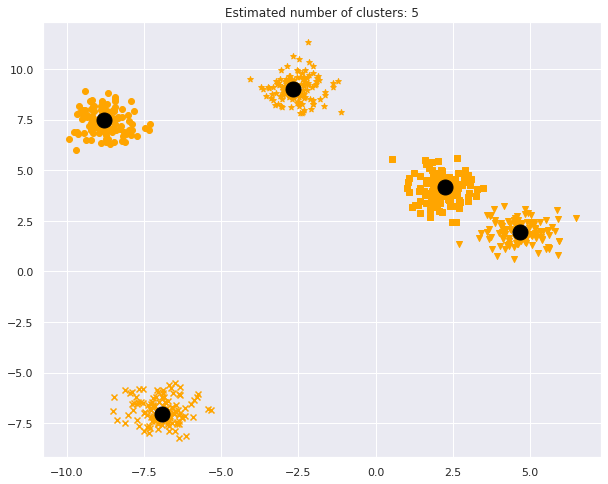

In [96]:
plt.figure(figsize = (10,8))
markers = '*vosx'
for i, marker in zip(range(n_clusters_), markers):
    plt.scatter(x[labels==i, 0], x[labels==i, 1], marker=marker,color = 'orange')
    cluster_center = centers[i]
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor='black',
             markeredgecolor='black', markersize=15)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()